In [3]:
import nltk; nltk.download('stopwords')

import spacy
nlp = spacy.load('es_core_news_sm', disable=['parser', 'ner'])

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
/home/jelbo/anaconda3/lib/python3.7/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [4]:
print("hola")

hola


In [5]:
DATASET_CSV="MAD_tecnologia1.csv"

df = pd.read_csv(DATASET_CSV,sep='|',error_bad_lines=False,header=None)

df.head(5)

,0,1,2,3
0,2017-05-23 10:33:41,Cooperativa,[Fotos] Mira las portadas de Vanity Fair para...,1 de 4 Vanity Fair La revista Vanity Fair la...
1,2017-06-01 13:50:01,elmostrador,[VIDEO] Una improvisada graduación en el metr...,"Santiago Jueves, 1 de junio de 2017 Actualiza..."
2,2017-03-02 21:45:28,Cooperativa,"[Fotos] ""La Celebración o el Drama del Paraís...",2 ATON Entre el 3 el 5 de marzo se presentar...
3,2017-03-02 21:57:54,Cooperativa,[Fotos] La protesta de taxis y colectivos de ...,1 de 5 ATON Taxis y colectivos de Valparaiso...
4,2017-03-03 00:38:36,24HorasTVN,Vía Pública - jueves 2 de marzo - Vía Pública...,En la edición de hoy revisamos las noticias m...


In [6]:
largo = df.shape[0]
print(largo)

2156


In [7]:
df.rename(columns={0:'fecha_hora',1:'nombre_medio',2:'titulo',3:'contenido'}, inplace=True)

In [8]:
df.columns

Index(['fecha_hora', 'nombre_medio', 'titulo', 'contenido'], dtype='object')

In [9]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('spanish')

In [10]:
# Convert to list
data = df.contenido.values.tolist()

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

[' 1 de 4 Vanity Fair La revista Vanity Fair lanzó cuatro portadas para '
 'celebrar los 40 años de "Star Wars" donde aparece el elenco de la próxima '
 'cinta, "The Last Jedi". Todas Cultura Deportes Economía Entretención Mundo '
 'País Sociedad Tecnología En la versión móvil de cooperativa.cl vea todas las '
 'noticias en el instante en que suceden. Reciba directamente en su correo '
 'electrónico los últimos titulares de cooperativa.cl Reciba gratis y en '
 'tiempo real las noticias de cooperativa.cl Reciba gratis y en tiempo real el '
 'audio digital de los programas radiales Síguenos en Facebook Síguenos en '
 'Twitter']


In [11]:
#Tokenizar en palabras y limpieza
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['de', 'vanity', 'fair', 'la', 'revista', 'vanity', 'fair', 'lanzo', 'cuatro', 'portadas', 'para', 'celebrar', 'los', 'anos', 'de', 'star', 'wars', 'donde', 'aparece', 'el', 'elenco', 'de', 'la', 'proxima', 'cinta', 'the', 'last', 'jedi', 'todas', 'cultura', 'deportes', 'economia', 'entretencion', 'mundo', 'pais', 'sociedad', 'tecnologia', 'en', 'la', 'version', 'movil', 'de', 'cooperativa', 'cl', 'vea', 'todas', 'las', 'noticias', 'en', 'el', 'instante', 'en', 'que', 'suceden', 'reciba', 'directamente', 'en', 'su', 'correo', 'electronico', 'los', 'ultimos', 'titulares', 'de', 'cooperativa', 'cl', 'reciba', 'gratis', 'en', 'tiempo', 'real', 'las', 'noticias', 'de', 'cooperativa', 'cl', 'reciba', 'gratis', 'en', 'tiempo', 'real', 'el', 'audio', 'digital', 'de', 'los', 'programas', 'radiales', 'siguenos', 'en', 'facebook', 'siguenos', 'en', 'twitter']]


In [12]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/home/jelbo/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['de', 'vanity', 'fair', 'la', 'revista', 'vanity', 'fair', 'lanzo', 'cuatro', 'portadas', 'para', 'celebrar', 'los', 'anos', 'de', 'star', 'wars', 'donde', 'aparece', 'el', 'elenco', 'de', 'la', 'proxima', 'cinta', 'the', 'last', 'jedi', 'todas', 'cultura', 'deportes', 'economia', 'entretencion', 'mundo', 'pais', 'sociedad', 'tecnologia', 'en', 'la', 'version', 'movil', 'de', 'cooperativa', 'cl', 'vea', 'todas', 'las', 'noticias', 'en', 'el', 'instante', 'en', 'que', 'suceden', 'reciba', 'directamente', 'en', 'su', 'correo', 'electronico', 'los', 'ultimos', 'titulares', 'de', 'cooperativa', 'cl', 'reciba', 'gratis', 'en', 'tiempo', 'real', 'las', 'noticias', 'de', 'cooperativa', 'cl', 'reciba', 'gratis', 'en', 'tiempo', 'real', 'el', 'audio', 'digital', 'de', 'los', 'programas', 'radiales', 'siguenos', 'en', 'facebook', 'siguenos', 'en', 'twitter']


In [13]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

#def make_trigrams(texts):
#    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [14]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
#data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['vanity', 'fair', 'revistar', 'vanity', 'fair', 'lanzar', 'portar', 'celebrar', 'ano', 'star', 'wars', 'aparecer', 'elenco', 'proxima', 'cintar', 'last', 'jedi', 'cultura', 'deporte', 'economia', 'entretencion', 'mundo', 'pais', 'sociedad', 'tecnologia', 'version', 'movil', 'cooperativo', 'ver', 'noticiar', 'instante', 'suceder', 'recibir', 'directamente', 'correar', 'electronico', 'ultimos', 'titular', 'cooperativo', 'recibir', 'tiempo', 'real', 'noticiar', 'cooperativo', 'recibir', 'tiempo', 'real', 'audio', 'digital', 'programar', 'radial', 'siguenos', 'facebook', 'siguenos', 'twitter']]


In [15]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 3), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1)]]


In [16]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [17]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=20))
doc_lda = lda_model[corpus]

[(0,
  '0.027*"tecnologia" + 0.017*"loading" + 0.015*"mas" + 0.010*"mundo" + '
  '0.007*"conectar" + 0.007*"inteligente" + 0.007*"working" + '
  '0.007*"desarrollar" + 0.007*"dato" + 0.007*"permitir" + 0.006*"hacer" + '
  '0.006*"problema" + 0.006*"decir" + 0.005*"ahora" + 0.005*"solo" + '
  '0.005*"ejemplo" + 0.005*"tambien" + 0.005*"usar" + 0.005*"personar" + '
  '0.005*"artificial"'),
 (1,
  '0.015*"televisor" + 0.014*"tecnologia" + 0.013*"pantalla" + 0.012*"web" + '
  '0.012*"pudrir" + 0.011*"aqui" + 0.011*"desarrollar" + 0.011*"mas" + '
  '0.011*"disenado" + 0.011*"inteligencia" + 0.011*"derecho" + 0.011*"sitiar" '
  '+ 0.010*"controlar" + 0.010*"recomendar" + 0.009*"asistir" + 0.009*"sesion" '
  '+ 0.009*"iniciar" + 0.009*"reservar" + 0.009*"imagen" + 0.008*"venir"'),
 (2,
  '0.051*"ciudad" + 0.044*"newsletter" + 0.025*"terminos" + 0.024*"propiedad" '
  '+ 0.024*"chile" + 0.024*"condicionar" + 0.023*"pronto" + 0.023*"elegir" + '
  '0.023*"querer" + 0.023*"mundo" + 0.023*"futuro" 

In [19]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=3,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [20]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=10, step=1)

In [21]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.059*"cooperativo" + 0.050*"recibir" + 0.034*"noticiar" + 0.034*"siguenos" '
  '+ 0.034*"tiempo" + 0.033*"real" + 0.022*"deporte" + 0.021*"mundo" + '
  '0.021*"pais" + 0.021*"entretencion"'),
 (1,
  '0.025*"tecnologia" + 0.012*"mas" + 0.006*"nuevo" + 0.006*"ciencia" + '
  '0.005*"desarrollar" + 0.005*"ano" + 0.004*"hacer" + 0.004*"tambien" + '
  '0.004*"chile" + 0.004*"usar"'),
 (2,
  '0.025*"ciudad" + 0.020*"newsletter" + 0.020*"tecnologia" + 0.019*"valor" + '
  '0.013*"chile" + 0.013*"sitiar" + 0.012*"futuro" + 0.012*"mundo" + '
  '0.011*"querer" + 0.011*"anunciar"')]


In [22]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=15, step=1)

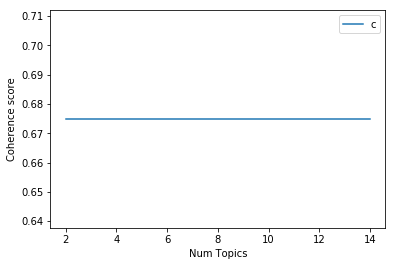

In [23]:
# Show graph
limit=15; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [24]:
#El maximo de la coherencia esta en 3
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [25]:
# Print the Keyword in the 3 topics
pprint(lda_model.print_topics(num_words=20))
doc_lda = lda_model[corpus]

[(0,
  '0.059*"cooperativo" + 0.050*"recibir" + 0.034*"noticiar" + 0.034*"siguenos" '
  '+ 0.034*"tiempo" + 0.034*"real" + 0.022*"deporte" + 0.021*"mundo" + '
  '0.021*"pais" + 0.021*"entretencion" + 0.019*"radiar" + 0.018*"twitter" + '
  '0.017*"facebook" + 0.017*"correar" + 0.017*"cultura" + 0.017*"titular" + '
  '0.017*"ver" + 0.017*"electronico" + 0.017*"digital" + 0.017*"version"'),
 (1,
  '0.025*"tecnologia" + 0.011*"mas" + 0.006*"nuevo" + 0.006*"ciencia" + '
  '0.005*"desarrollar" + 0.004*"ano" + 0.004*"hacer" + 0.004*"chile" + '
  '0.004*"tambien" + 0.004*"usar" + 0.003*"partir" + 0.003*"empresa" + '
  '0.003*"mundo" + 0.003*"proyectar" + 0.003*"decir" + 0.003*"permitir" + '
  '0.003*"santiago" + 0.003*"millón" + 0.003*"trabajar" + 0.002*"sistema"'),
 (2,
  '0.025*"ciudad" + 0.022*"newsletter" + 0.020*"valor" + 0.019*"tecnologia" + '
  '0.014*"sitiar" + 0.014*"chile" + 0.012*"mundo" + 0.012*"terminos" + '
  '0.012*"futuro" + 0.012*"propiedad" + 0.012*"anunciar" + 0.012*"querer"

In [26]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        #row = sorted(row, key=lambda x: (x[1]), reverse=True)
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.9963,"cooperativo, recibir, noticiar, siguenos, tiem...",1 de 4 Vanity Fair La revista Vanity Fair lan...
1,1,1.0,0.6816,"tecnologia, mas, nuevo, ciencia, desarrollar, ...","Santiago Jueves, 1 de junio de 2017 Actualiza..."
2,2,0.0,0.9957,"cooperativo, recibir, noticiar, siguenos, tiem...",2 ATON Entre el 3 el 5 de marzo se presentará...
3,3,0.0,0.8650,"cooperativo, recibir, noticiar, siguenos, tiem...",1 de 5 ATON Taxis y colectivos de Valparaiso ...
4,4,1.0,0.8689,"tecnologia, mas, nuevo, ciencia, desarrollar, ...",En la edición de hoy revisamos las noticias m...
5,5,0.0,0.9371,"cooperativo, recibir, noticiar, siguenos, tiem...",2 Photosport Colo Colo ya tiene su oncena par...
6,6,0.0,0.9959,"cooperativo, recibir, noticiar, siguenos, tiem...",3 EFE Las victorias de San Antonio Spurs ante...
7,7,0.0,0.9293,"cooperativo, recibir, noticiar, siguenos, tiem...","2 ATON La Presidenta de la República, Michell..."
8,8,0.0,0.9190,"cooperativo, recibir, noticiar, siguenos, tiem...","2 EFE Este martes, Andy Murray tuvo un estren..."
9,9,0.0,0.9961,"cooperativo, recibir, noticiar, siguenos, tiem...",3 EFE Varios actores ya han desfilado por la ...


In [27]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9971,"cooperativo, recibir, noticiar, siguenos, tiem...",ESCUCHA AQUI RADIO COOPERATIVA RADIO DULCE PA...
1,1.0,0.9996,"tecnologia, mas, nuevo, ciencia, desarrollar, ...",Los programas de reconocimiento facial pueden...
2,2.0,0.9953,"ciudad, newsletter, tecnologia, valor, chile, ...",Ayer Hoy se conmemora el Día Nacional de las ...


In [28]:
sent_topics_sorteddf_mallet["Text"][0]

' ESCUCHA AQUI RADIO COOPERATIVA RADIO DULCE PATRIA R. Vehicular: No aplica Todo Deportes País Mundo Entretención 1 Photosport El técnico Mario Salas ya definió la alineación titular de Universidad Católica para jugar ante Unión Española en la segunda fecha del Torneo de Transición. Arquero: Cristopher Toselli. Todas Cultura Deportes Economía Entretención Mundo País Sociedad Tecnología En la versión móvil de cooperativa.cl vea todas las noticias en el instante en que suceden. Reciba directamente en su correo electrónico los últimos titulares de cooperativa.cl Reciba gratis y en tiempo real las noticias de cooperativa.cl Reciba gratis y en tiempo real el audio digital de los programas radiales Síguenos en Facebook Síguenos en Twitter'

In [29]:
sent_topics_sorteddf_mallet["Text"][1]

' Los programas de reconocimiento facial pueden medir decenas de características individuales. Helena de Troya bien pudo ser, en las palabras del dramaturgo isabelino Christopher Marlowe la mujer cuya "cara lanzó mil embarcaciones". Pero, en esta esta época moderna, su rostro también podría lanzar muchas otras cosas. Por ejemplo, abrir cuentas bancarias, autorizar pagos online, acelerar el paso por la seguridad aeroportuaria o incluso activar alarmas, si por ejemplo se le identifica como un potencial riesgo al entrar en una ciudad (Troya, ¿quizás?) Todo debido a que la tecnología de reconocimiento facial ha evolucionado a una velocidad vertiginosa, con consecuencias que podrían ser benignas o completamente siniestras, dependiendo del punto de vista. Las cámaras de alta definición, combinadas con software inteligente capaz de medir decenas de "puntos nodales" en nuestras caras -como la distancia entre los ojos, la longitud o anchura de la nariz, por ejemplo- están siendo incorporados al

In [30]:
sent_topics_sorteddf_mallet["Text"][2]

' Ayer Hoy se conmemora el Día Nacional de las Frutas y Verduras, impulasado por el Instituto de Nutrición y Tecnología de los Alimentos (INTA) de la Universidad de Chile y el Ministerio de Agricultura. Nutricionista de la Clínica Bupa Reñaca explica sus beneficios. Publicado por: Ayskée Solís Empresa El Mercurio de Valparaíso SAP Contáctenos Anunciar en este sitio Términos y condiciones Autos Emol Valor Futuro Farox Guioteca Inmobiliaria Propiedades hoyxhoy.cl Pronto recibirás nuestros correos Suscríbete al newsletter de soychile.cl y entérate de lo que sucede en tu ciudad, en Chile y el mundo. Elige tu ciudad ¿Cuándo quieres recibir nuestro newsletter?'